# Multiple Models Analysis

In [1]:
# Import Everything we need
import setup

from DLAnalysis.Scan import *
from DLAnalysis.LoadModel import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
# Choose the Models to look at
import glob
#ModelDirs=filter(lambda n: n[-1]!="1", glob.glob("TrainedModels/*.1"))
ModelDirs=glob.glob("TrainedModels/*.1")

MyModels=LoadModels(ModelDirs,MetaDataOnly=True)

Failed to load model from: TrainedModels/CaloDNN_256_4_0.01_SGD_0.001_Merged.1
Failed to load model from: TrainedModels/CaloDNN_32_3_0.001_Adam_0.01_Merged.1
Failed to load model from: TrainedModels/CaloDNN_128_4_0.01_SGD_0.01_Merged.1
Failed to load model from: TrainedModels/CaloDNN_512_3_0.01_Adam_0.01_Merged.1
Failed to load model from: TrainedModels/CaloDNN_256_4_0.01_RMSprop_0.01_Merged.1
Failed to load model from: TrainedModels/CaloDNN_32_4_0.001_Adam_0.01_Merged.1
Failed to load model from: TrainedModels/CaloDNN_64_4_0.001_Adam_0.01_Merged.1
Failed to load model from: TrainedModels/CaloDNN_256_3_0.01_RMSprop_0.001_Merged.1
Failed to load model from: TrainedModels/CaloDNN_32_4_0.001_RMSprop_0.01_Merged.1
Failed to load model from: TrainedModels/CaloDNN_32_4_0.001_SGD_0.01_Merged.1
Failed to load model from: TrainedModels/CaloDNN_128_4_0.01_RMSprop_0.01_Merged.1
Failed to load model from: TrainedModels/CaloDNN_64_3_0.01_RMSprop_0.001_Merged.1
Failed to load model from: TrainedMode

In [3]:
# Prep the Models

# Rename the Models using Width and Depth
#ResetNames(MyModels,["Width","Depth","lr","decay","optimizer"])
ResetNames(MyModels,["Width","Depth"])

# Add the number of epochs to MetaData by counting length of history
GetEpochs(MyModels)

# Pull data from previous trainings into latest MetaData, with "All_" suffix
print "Historical Parameters:",GetHistorical(MyModels) 

Historical Parameters: ['All_ChPi_AUC', 'All_Ele_AUC', 'All_Gamma_AUC', 'All_Pi0_AUC', 'All_Width', 'All_History.val_acc', 'All_History.loss', 'All_HyperParamSet', 'All_History.val_loss', 'All_History.acc', 'All_decay', 'All_lr', 'All_Depth']


In [4]:
# Get a List of all numbers stored in MetaData
print "Available Parameters:", GetGoodParams(MyModels)

Available Parameters: ['Ele_AUC', 'Width', 'Depth', 'Pi0_AUC', 'HyperParamSet', 'decay', 'lr', 'Epochs', 'Gamma_AUC', 'ChPi_AUC']


In [5]:
# Make a Table of all relevant parameters, sort by 1,2,then 0 columns.
# Note: Parameters are optional... but the columns and rows will be not optimally sorted.
ScanTable(MyModels,['Model Name', 'optimizer', 'Epochs', "lr","decay",'Pi0_AUC','Gamma_AUC','Ele_AUC','ChPi_AUC'],[0,1,3,4])

Model Name         optimizer      Epochs      lr    decay    Pi0_AUC    Gamma_AUC    Ele_AUC    ChPi_AUC
-----------------  -----------  --------  ------  -------  ---------  -----------  ---------  ----------
Width=128 Depth=1  'Adam'             21  0.0010   0.0010     0.8598       0.9000     0.9744      0.9975
Width=128 Depth=1  'Adam'             18  0.0010   0.0100     0.8859       0.9125     0.9771      0.9986
Width=128 Depth=1  'Adam'             18  0.0100   0.0010     0.8665       0.8793     0.9463      0.9898
Width=128 Depth=1  'Adam'             18  0.0100   0.0100     0.8690       0.9022     0.9808      0.9988
Width=128 Depth=1  'RMSprop'          33  0.0010   0.0010     0.8703       0.9127     0.9853      0.9987
Width=128 Depth=1  'RMSprop'          15  0.0010   0.0100     0.8945       0.9145     0.9766      0.9983
Width=128 Depth=1  'RMSprop'          15  0.0100   0.0010     0.8600       0.9022     0.9788      0.9987
Width=128 Depth=1  'RMSprop'          15  0.0100   0.01

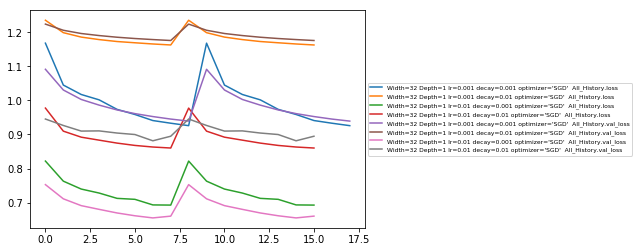

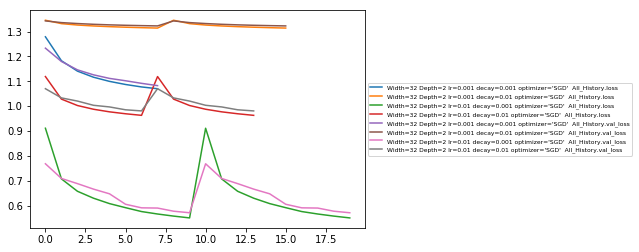

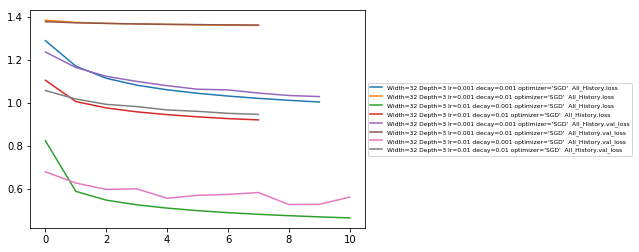

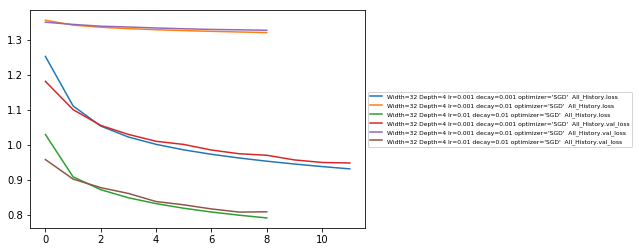

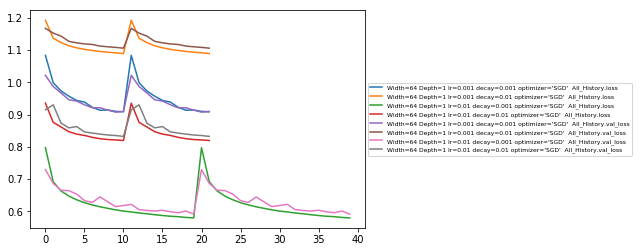

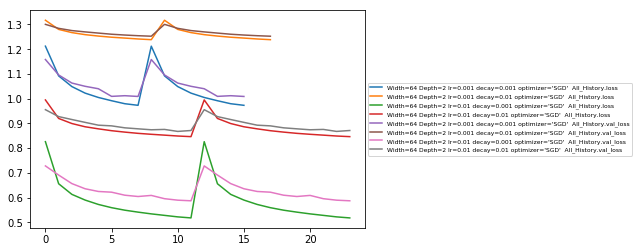

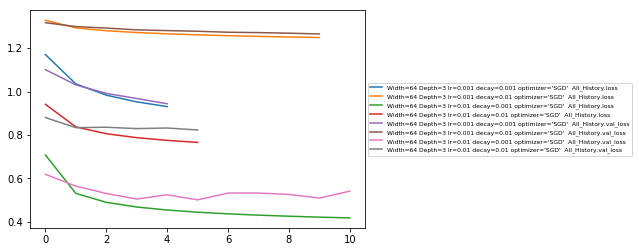

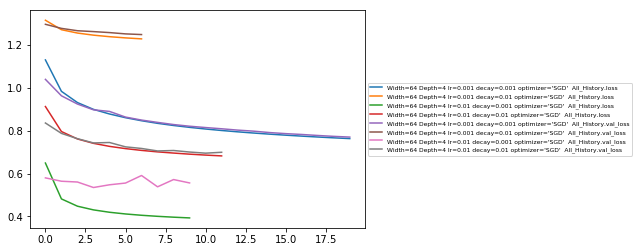

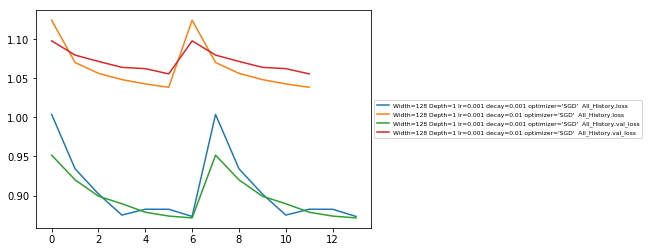

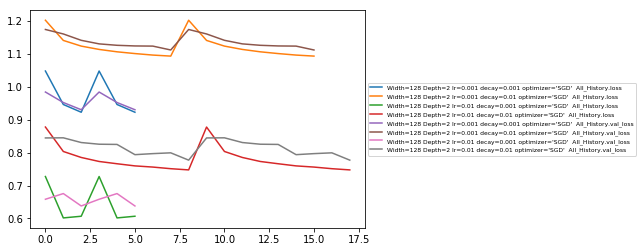

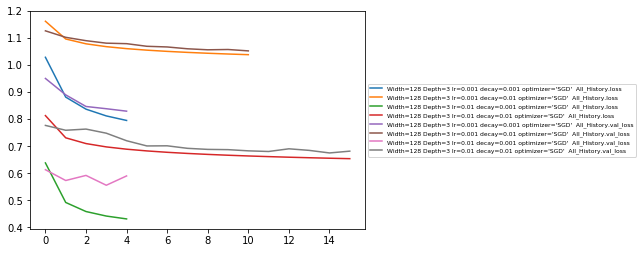

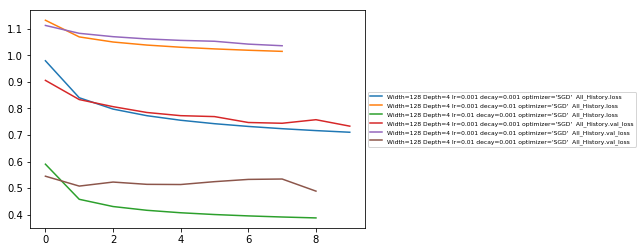

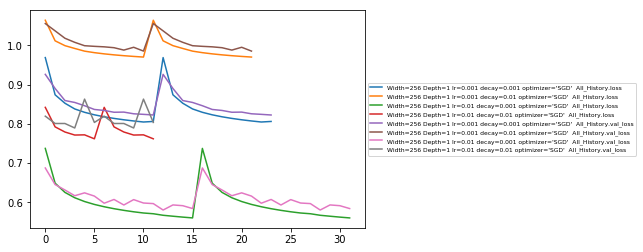

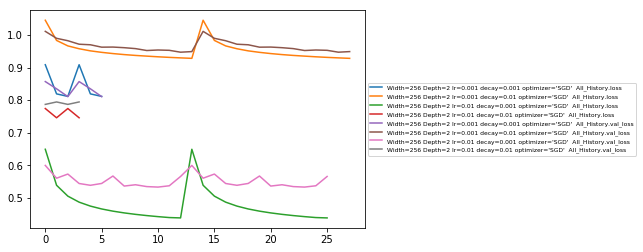

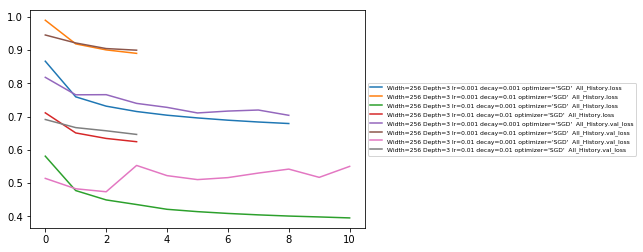

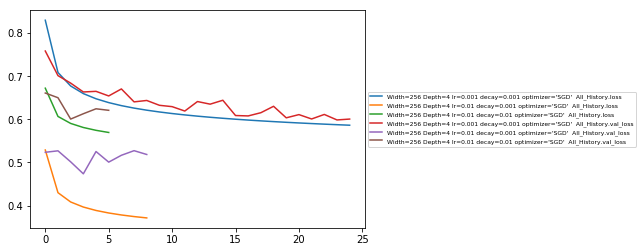

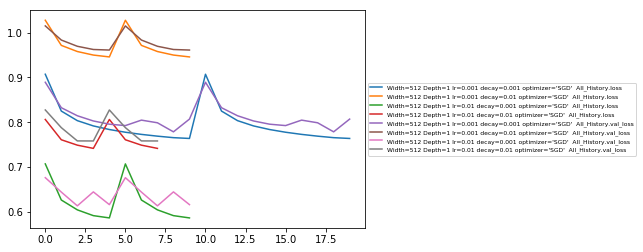

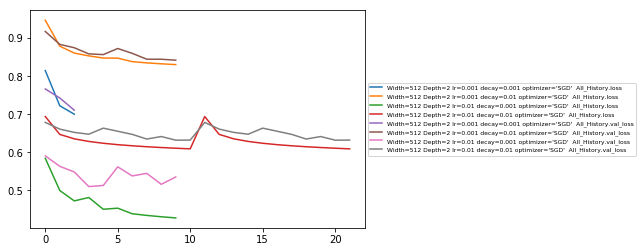

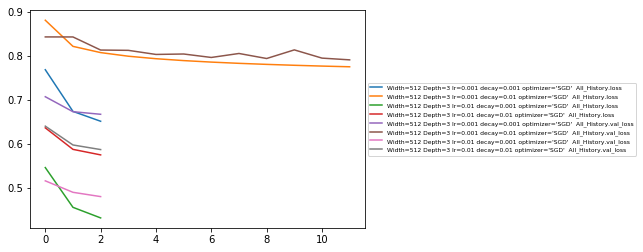

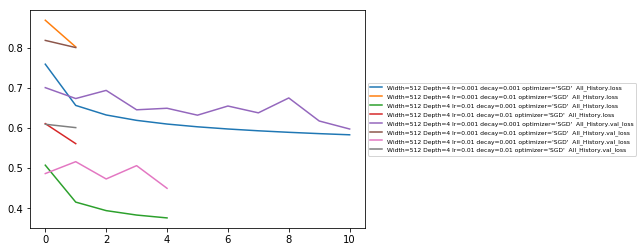

In [10]:
# Plot Historical MetaData... put 4 models per plot
#PlotMetaDataMany(MyModels,4,["History","val_loss"],loc="center left")
ResetNames(MyModels,["Width","Depth","lr","decay","optimizer"])
PlotMetaDataMany(SelectModels(MyModels,MetaDataEvaluator("optimizer=='SGD'",params=["optimizer"])),
                 4,[["All_History.loss"],["All_History.val_loss"]],
                 sort=["Width","Depth","lr","decay"],switch=["Width","Depth"],loc="center left")

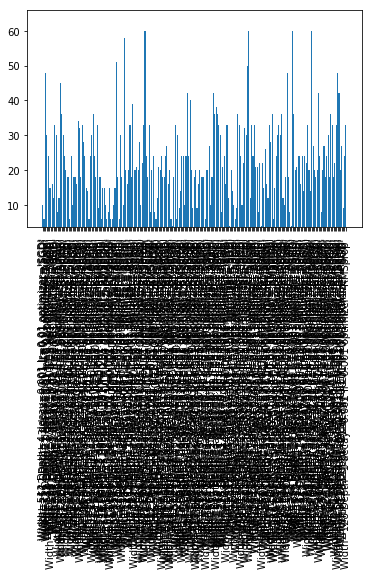

In [7]:
# Compare Number of Epochs each model ran (only last run)
PlotMetaData(MyModels,["Epochs"])

Ele_AUC


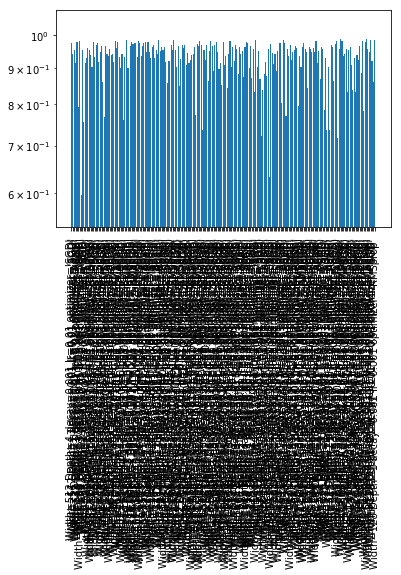

Pi0_AUC


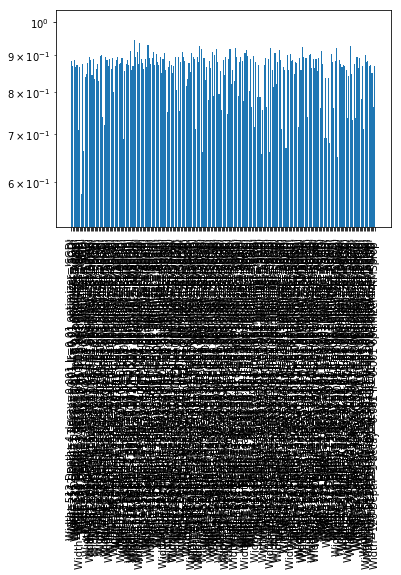

ChPi_AUC


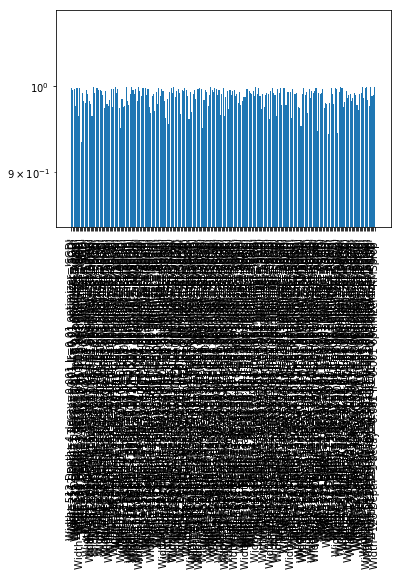

Gamma_AUC


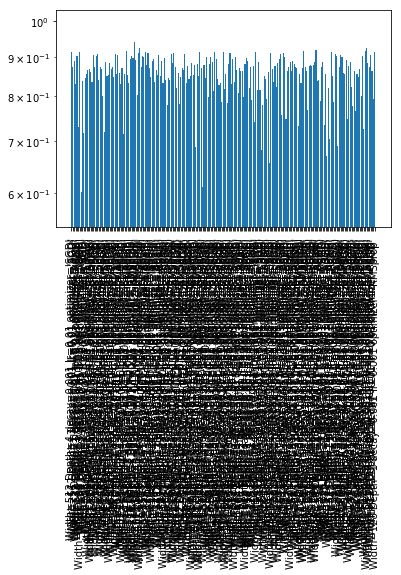

In [8]:
# Compare AUCs for all models
for p in ['Ele_AUC', 'Pi0_AUC', 'ChPi_AUC', 'Gamma_AUC']:
    print p
    PlotMetaData(MyModels,[p],log=True)
    plt.show()

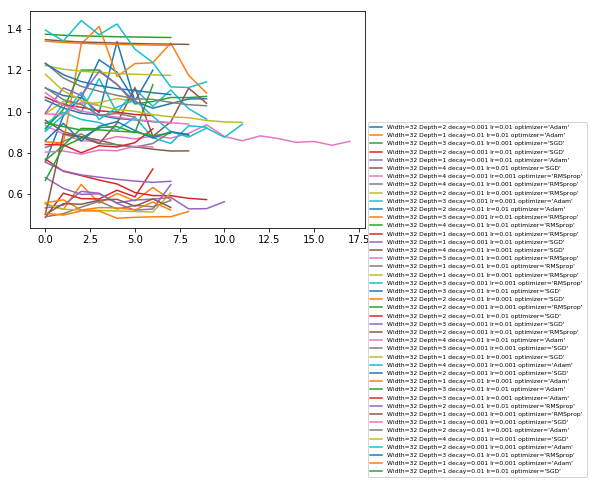

In [7]:
# Select models with width==32 and plot val_loss.
PlotMetaData(filter(lambda m: m.MetaData["Width"]==32, MyModels), ["History","val_loss"],loc=0)

In [ ]:
# Plot a varible for all trainings. This was pulled together above.
PlotMetaData(MyModels,["All_History.val_loss"],loc="center left")

In [ ]:
PlotMetaData(SelectModels(MyModels,lambda(m): m.MetaData["lr"]==0.01),["All_History.val_loss"],loc="center left")

In [ ]:
MyModels[0].MetaData["lr"]


In [ ]:
M